In [1]:
# Here we correct for batch effects and other technical confounders
library(scRNA.seq.funcs)
library(RUVSeq)
library(scater)
library(SingleCellExperiment)
library(scran)
library(kBET)
library(sva) # Combat
library(edgeR)
set.seed(1234567)
options(stringsAsFactors = FALSE)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain intro

In [ ]:
umi <- readRDS("post_common_normalisation_approaches.rds")

In [3]:
qclust <- quickCluster(umi, min.size = 30)
umi <- computeSumFactors(umi, sizes = 15, clusters = qclust)
umi.qc <- normalize(umi)

In [5]:
ruvg <- RUVg(counts(umi.qc), k = 1)
assay(umi.qc, "ruvg1") <- log2(
    t(t(ruvg$normalizedCounts) / colSums(ruvg$normalizedCounts) * 1e6) + 1
)
ruvg <- RUVg(counts(umi.qc), k = 10)
assay(umi.qc, "ruvg10") <- log2(
    t(t(ruvg$normalizedCounts) / colSums(ruvg$normalizedCounts) * 1e6) + 1
)

In [9]:
combat_data <- logcounts(umi.qc)
mod_data <- as.data.frame(t(combat_data))
# Basic batch removal
mod0 = model.matrix(~ 1, data = mod_data) 

# adjust for total genes detected
mod2 = model.matrix(~ umi.qc$total_features, data = mod_data)
assay(umi.qc, "combat") <- ComBat(
    dat = t(mod_data), 
    batch = factor(umi.qc$plate_number), 
    mod = mod0,
    par.prior = TRUE,
    prior.plots = FALSE
)

Found2batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [23]:
dim(logcounts(umi.qc[,umi.qc$plate_number == "plate2"]))

[1] 20662    96

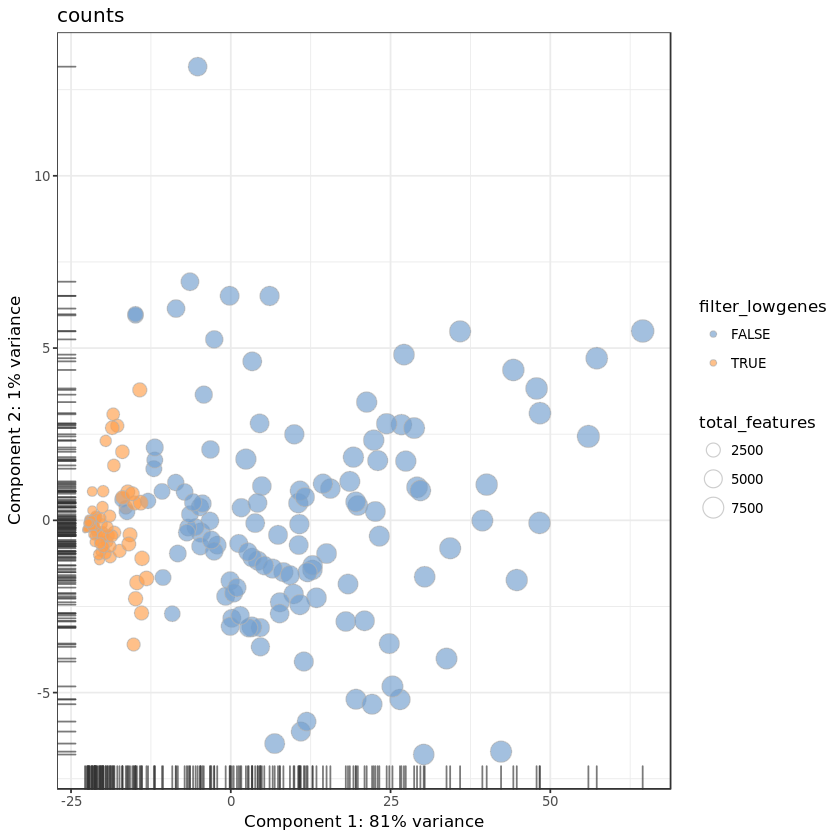

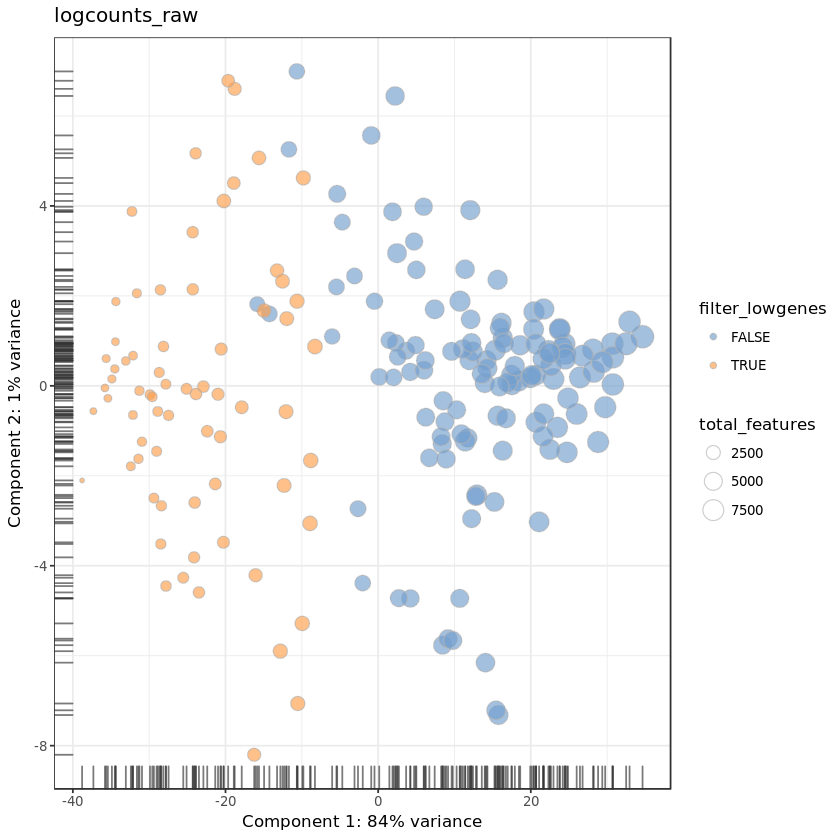

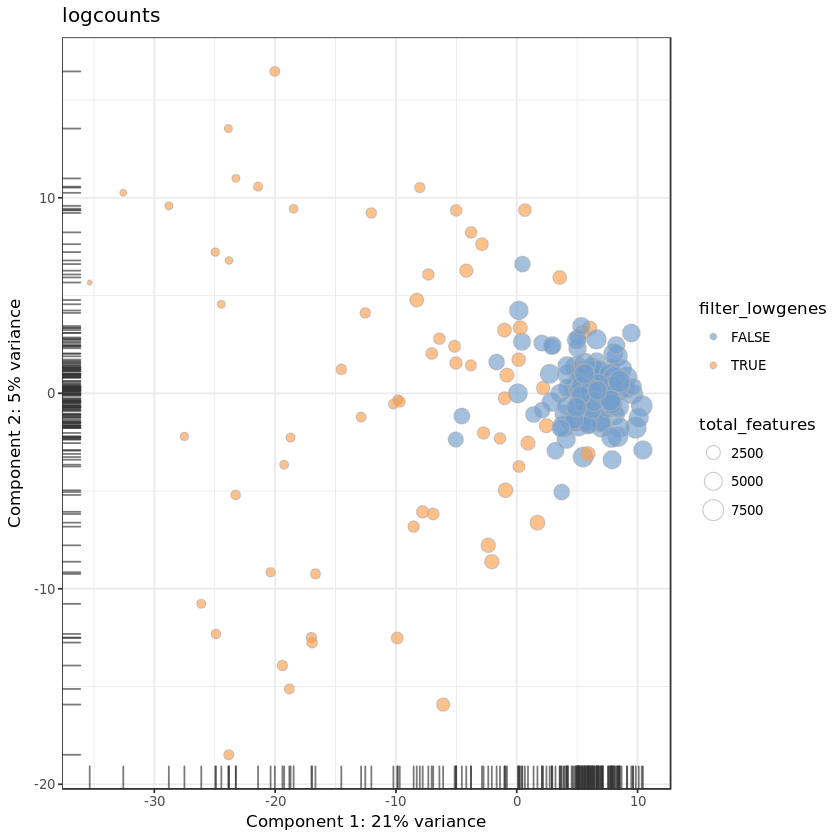

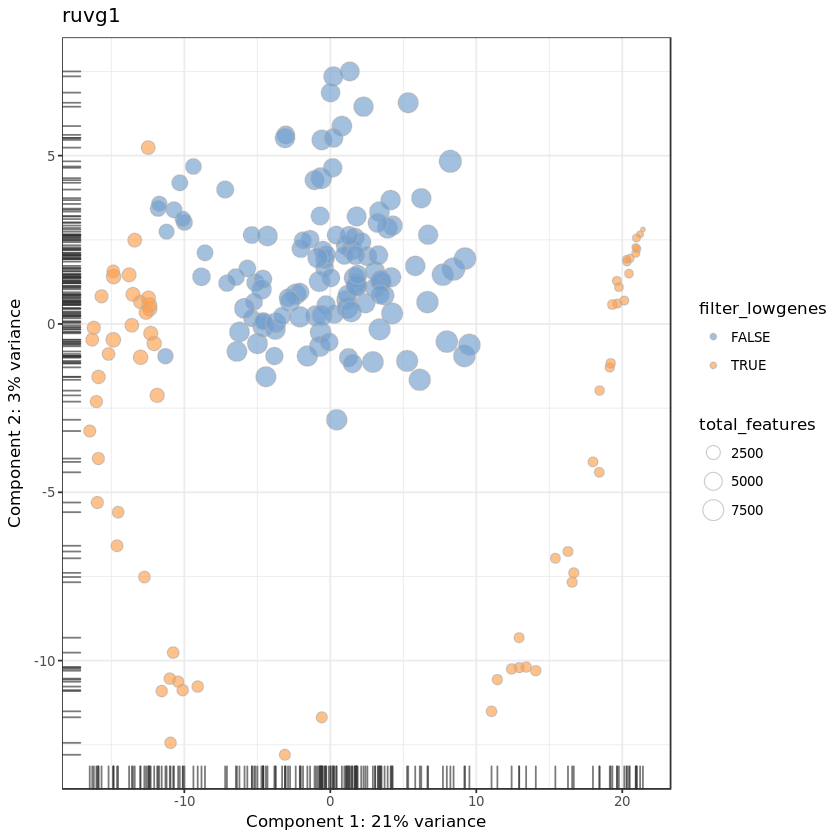

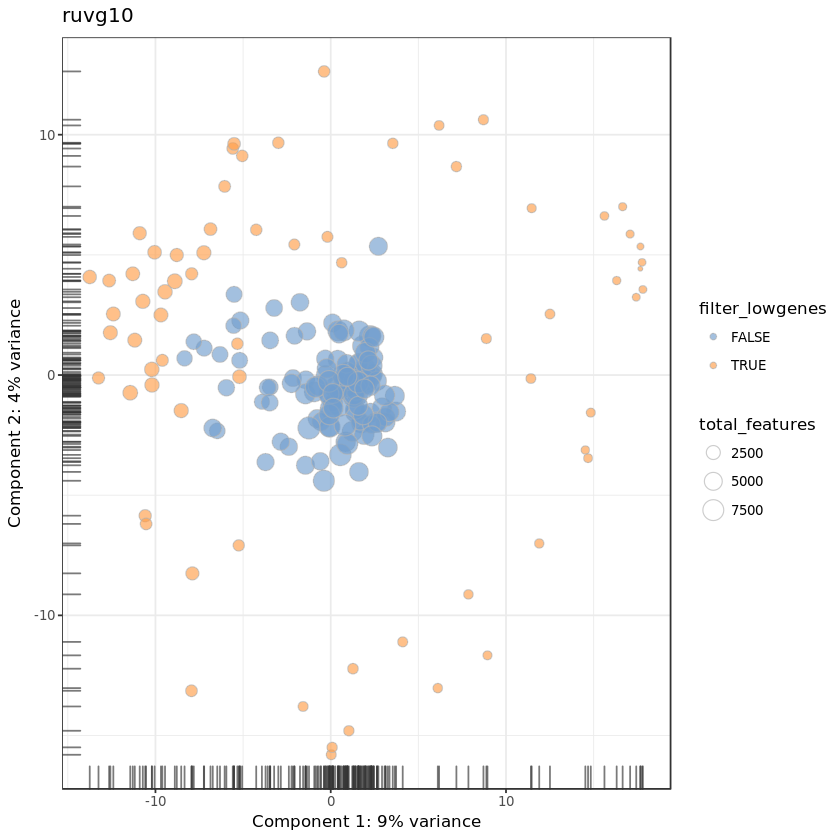

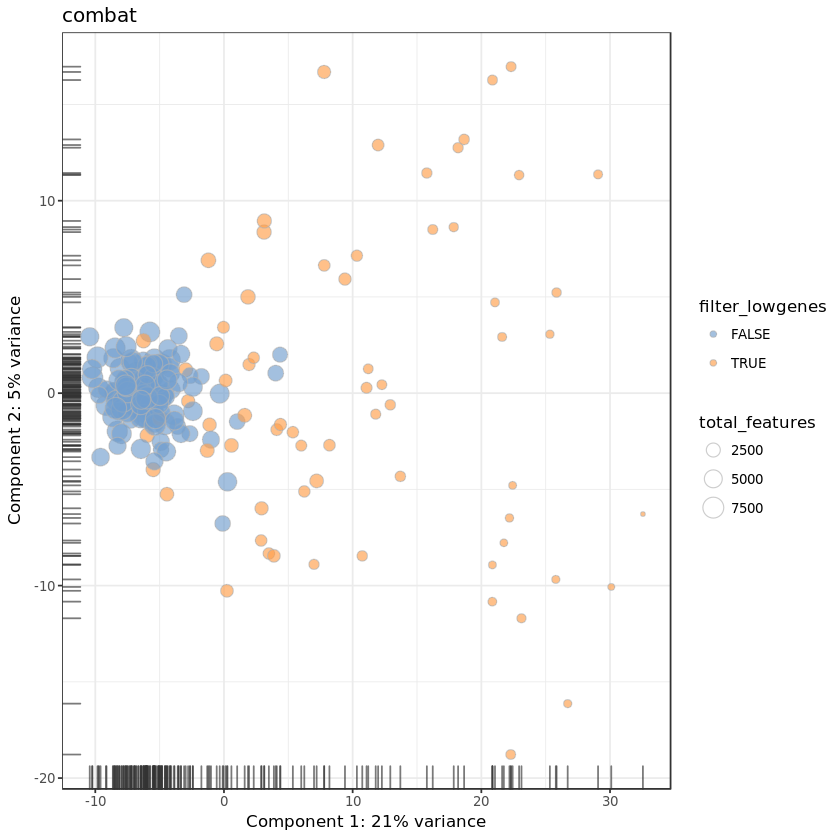

In [27]:
for(n in assayNames(umi.qc)) {
    print(
        plotPCA(
            umi.qc,
            colour_by = "filter_lowgenes",
            size_by = "total_features",
            exprs_values = n
        ) +
        ggtitle(n)
    )
}

This RLE only evaluates if the number of genes higher and lower than the average for each cell are equal (i.e. systematic effects)


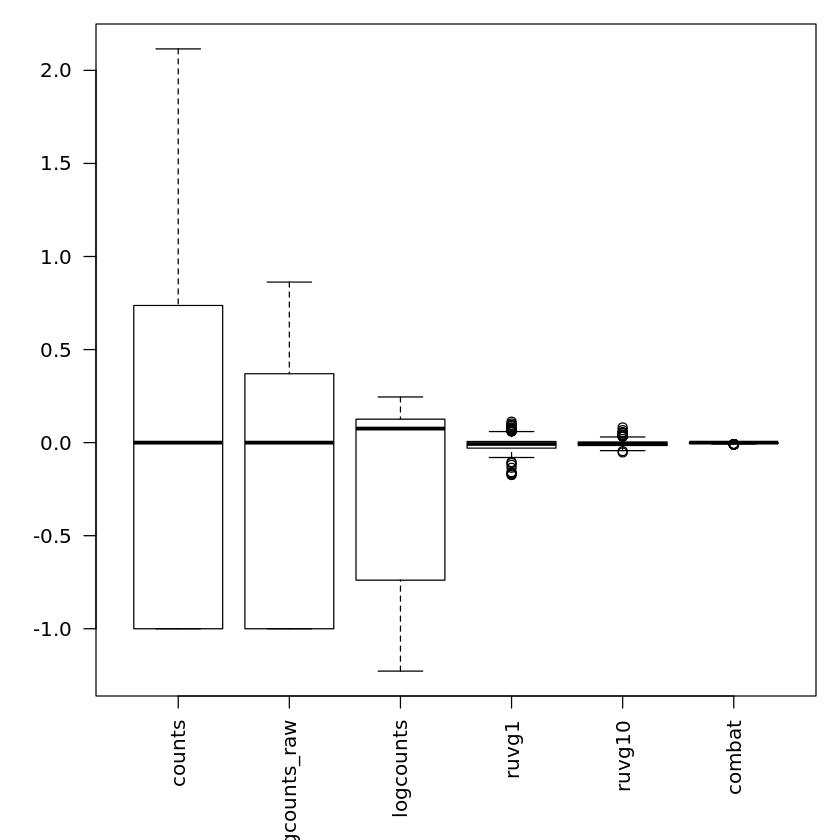

In [30]:
res <- list()
for(n in assayNames(umi.qc)) {
    res[[n]] <- suppressWarnings(calc_cell_RLE(assay(umi.qc, n)))
}
par(mar=c(6,4,1,1))
boxplot(res, las=2)

message("This RLE only evaluates if the number of genes higher and lower than the average for each cell are equal (i.e. systematic effects)")

Warning message in plotExplanatoryVariables(object, ...):
“variable batch not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable individual not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable pct_counts_ERCC not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable pct_counts_MT not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable batch not found in colData(object).
                     

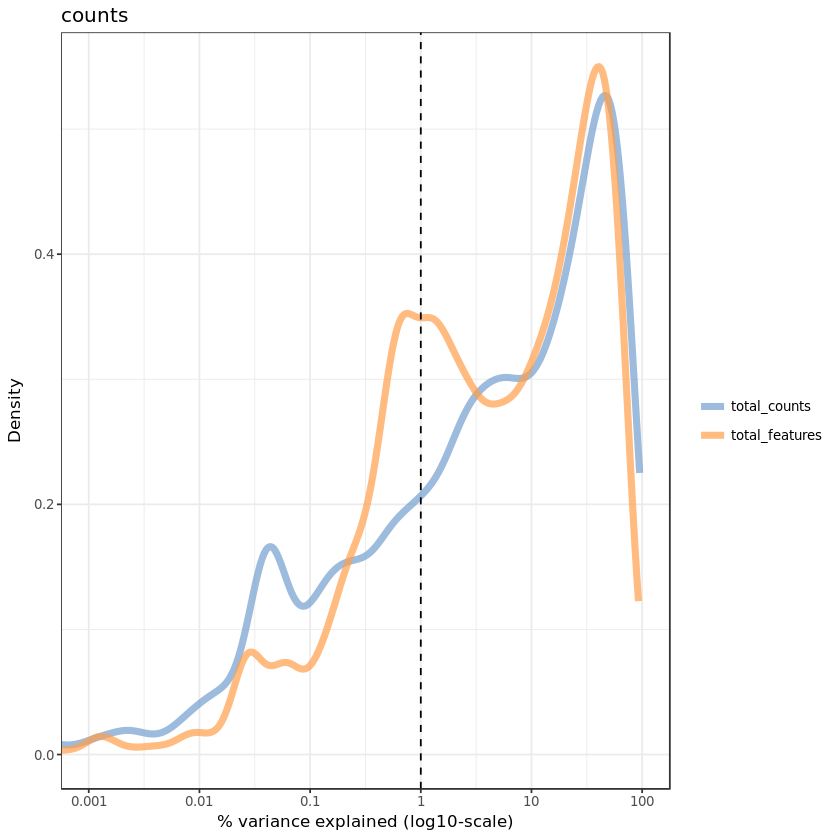

Warning message in plotExplanatoryVariables(object, ...):
“variable batch not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable individual not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable pct_counts_ERCC not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable pct_counts_MT not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”

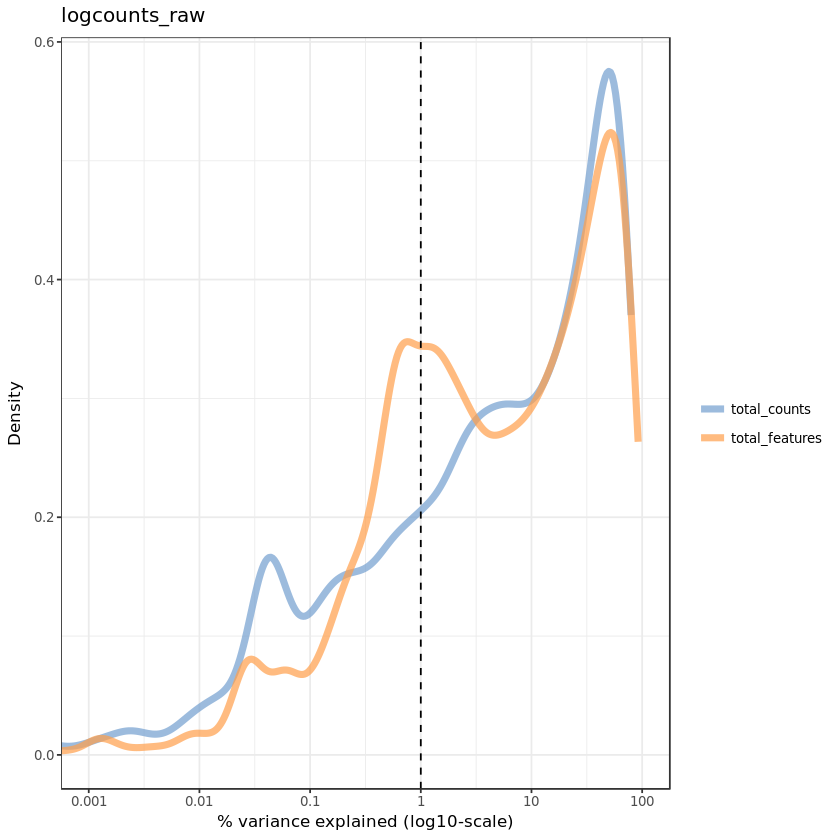

Warning message in plotExplanatoryVariables(object, ...):
“variable batch not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable individual not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable pct_counts_ERCC not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable pct_counts_MT not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”

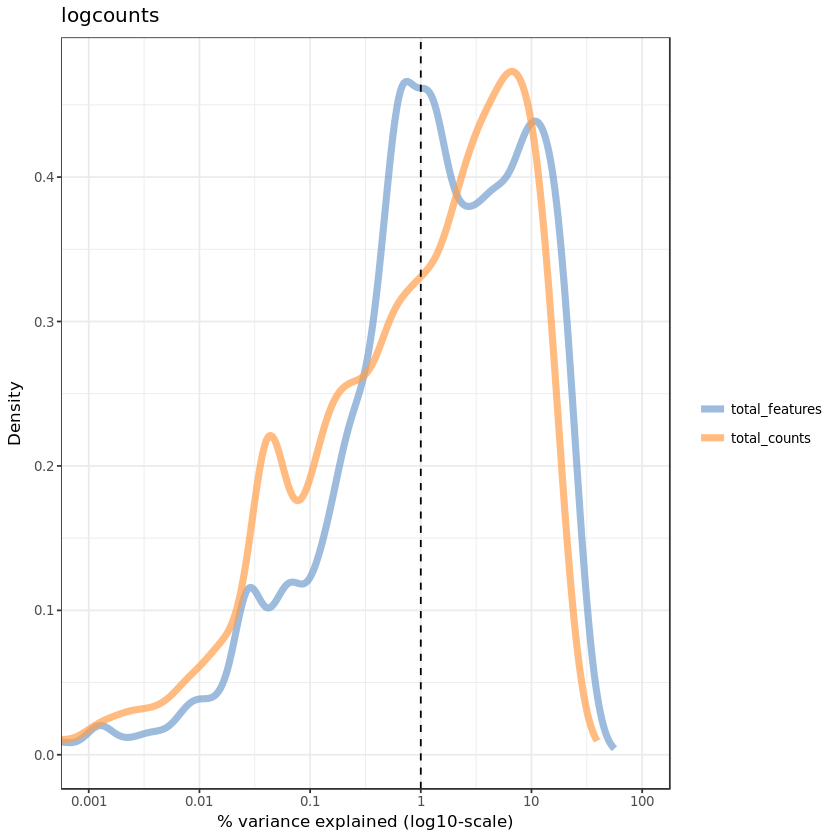

Warning message:
“Removed 28 rows containing non-finite values (stat_density).”Warning message in plotExplanatoryVariables(object, ...):
“variable batch not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable individual not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable pct_counts_ERCC not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”Warning message in plotExplanatoryVariables(object, ...):
“variable pct_counts_MT not found in colData(object).
                     Please make sure colData(object)[, variable] exists. This variable will not be plotted.”

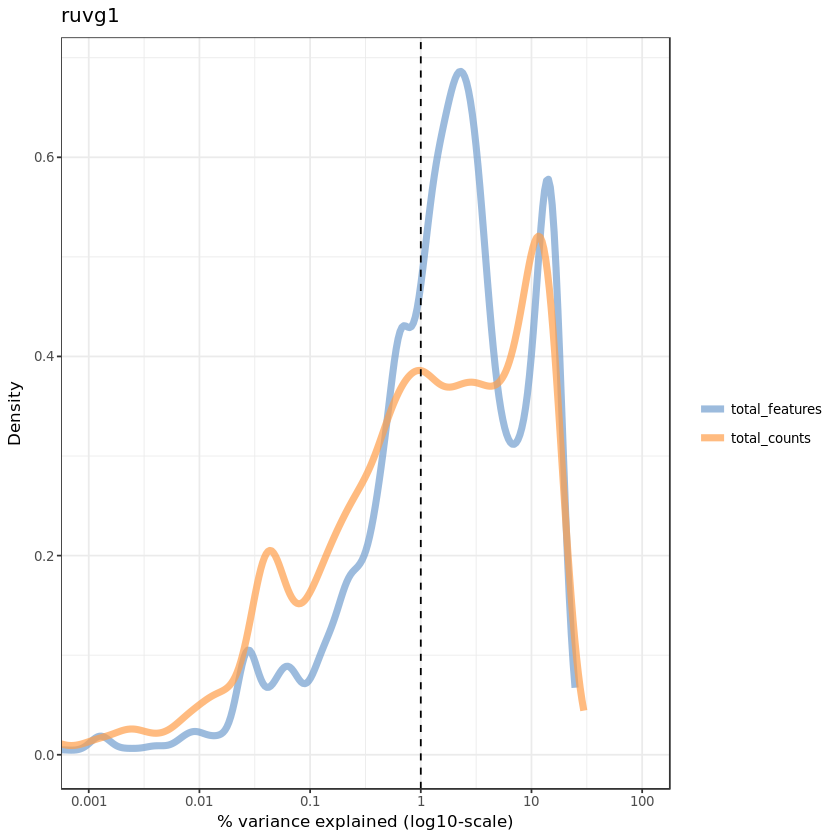

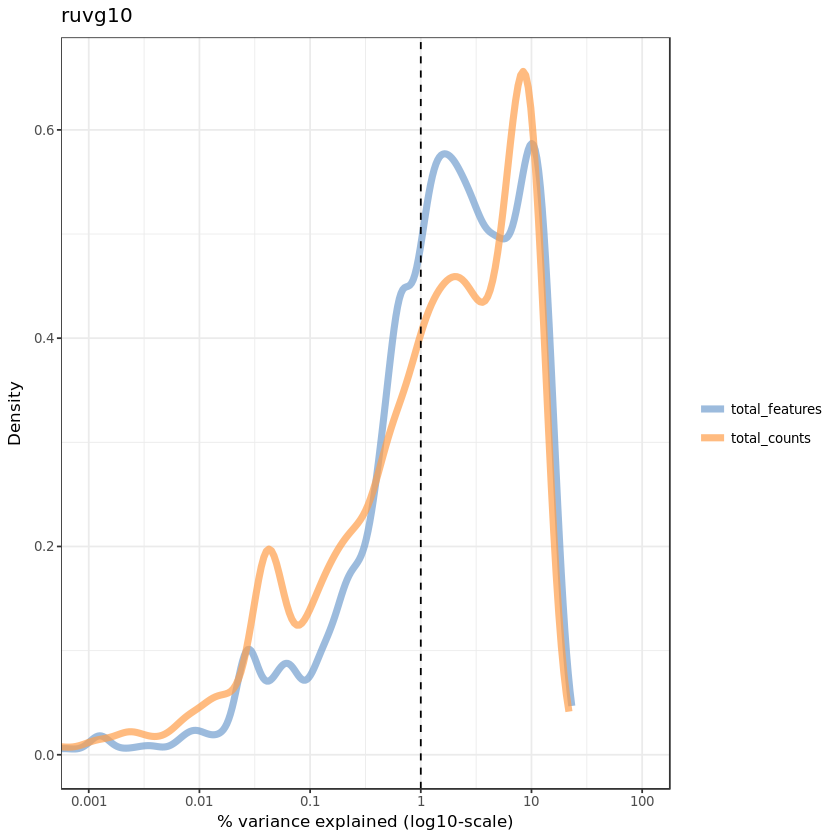

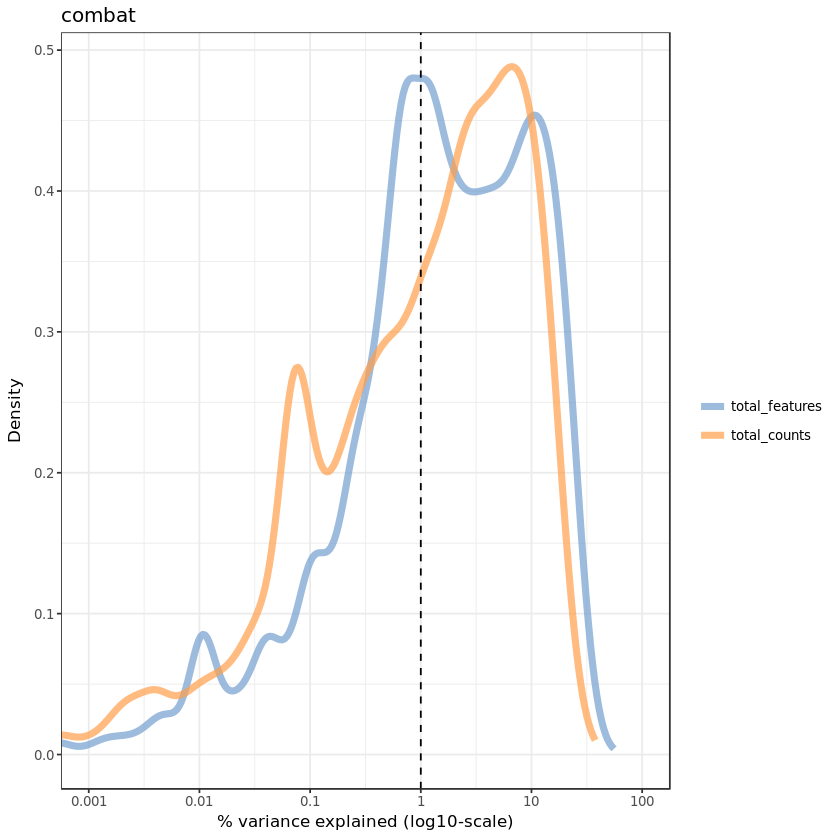

In [32]:
for(n in assayNames(umi.qc)) {
    print(
        plotQC(
            umi.qc,
            type = "expl",
            exprs_values = n,
            variables = c(
                "total_features",
                "total_counts",
                "batch",
                "individual",
                "pct_counts_ERCC",
                "pct_counts_MT"
            )
        ) +
        ggtitle(n)
    )
}

In [34]:
# Let's also look at intermingling points of data from different batches.
# - The proportion of cells from each batch in any local region should be about the same
#   as the global proportion
compare_kBET_results <- function(sce){
    norms <- assayNames(sce) # Get all normalizations
    results <- list()
    for (j in norms){
        tmp <- kBET(
            df = t(assay(sce, j)),
            batch = sce$plate_number, 
            heuristic = TRUE, 
            verbose = FALSE, 
            addTest = FALSE, 
            plot = FALSE
        )
        results[[j]] <- tmp$summary$kBET.observed[1]
    }
    return(as.data.frame(results))
}

eff_debatching <- compare_kBET_results(umi.qc)

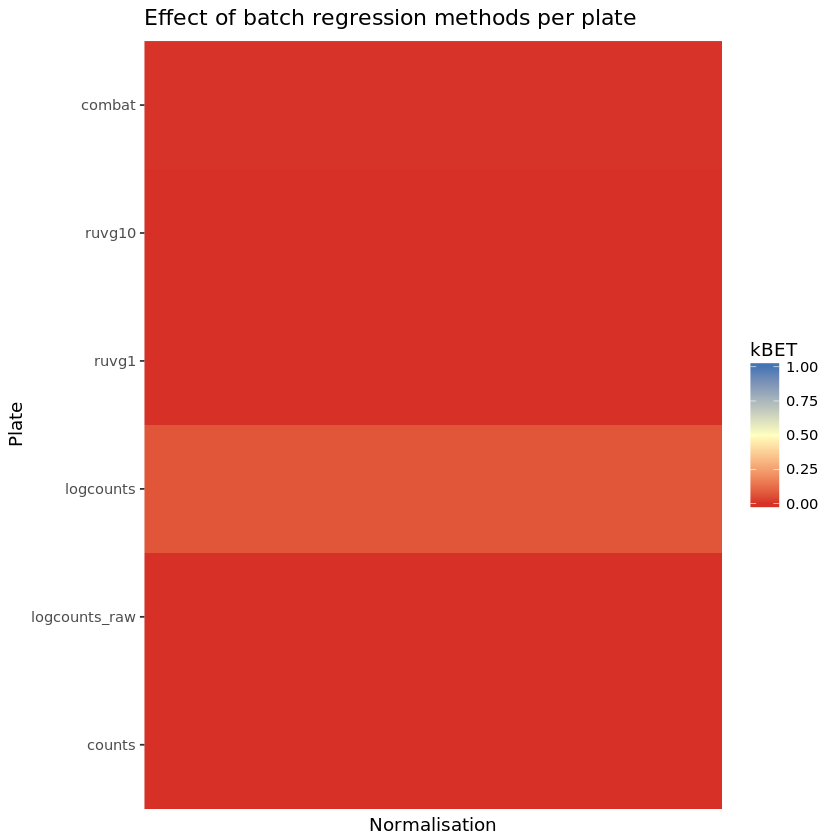

In [37]:
require("reshape2")
require("RColorBrewer")
# Plot results
dod <- melt(as.matrix(eff_debatching),  value.name = "kBET")
colnames(dod)[1:2] <- c("Normalisation", "Plate")

colorset <- c('gray', brewer.pal(n = 9, "RdYlBu"))

ggplot(dod, aes(Normalisation, Plate, fill=kBET)) +  
    geom_tile() +
    scale_fill_gradient2(
        na.value = "gray",
        low = colorset[2],
        mid=colorset[6],
        high = colorset[10],
        midpoint = 0.5, limit = c(0,1)) +
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_discrete(expand = c(0, 0)) + 
    theme(
        axis.text.x = element_text(
            angle = 45, 
            vjust = 1, 
            size = 12, 
            hjust = 1
        )
    ) + 
    ggtitle("Effect of batch regression methods per plate")